<a href="https://colab.research.google.com/github/ligsid/comput_math_MIPT/blob/master/sweep_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4
## Метод прогонки
#### Вариант 2, задание 5

Условия задачи:
</br>Найти решение краевой задачи для одномерного стационарного уравнения теплопроводности $$ \frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x) $$
в одиннадцати равноудаленных точках отрезка $[0, 1]$ с относительной погрешностью $0.0001$
</br> Краевые условия задачи: 
$$ u(0 + 0) = u(1 - 0) $$ $$ k(0 + 0)u'_{x}(0 + 0) = k(1 - 0)u'_{x}(1 - 0) $$ $$ k(x) = 1 $$ $$ q(x) = e^{sin2\pi x}$$ $$f(x) = e^{cos2\pi x} $$
</br> Модельная задача: $$ k(x) = 1 $$ $$ q(x) = 1 $$ $$ f(x) = 1 + cos2\pi x $$

Для начала определим необходимые в последующем библиотеки:

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

1. Получаем аналитическое решение модельной задачи:
$$ u(x) = C_{1}e^{x} + C_{2}e^{x} + \frac{cos2\pi x}{1 + 4\pi^2} + 1 $$
</br> Из краевых условий получаем, что $C_{1} = C_{2} = 0$ $$ u(x) = \frac{cos2\pi x}{1 + 4\pi^2} + 1$$

Определяем функции нашей модельной задачи

In [ ]:
x = np.linspace(0, 1, 11)
h = 1/10
random = 1
def u(x):
  return np.cos(2*np.pi*x)/(1 + 4*np.pi**2) + 1
def f(x):
  return 1 + np.cos(np.pi * 2 * x)
def k(x):
  return 1
def q(x):
  return 1

### Метод прогонки, реализован прямой ход и обратный ход

In [ ]:
def progonka_forward(x):
  alpha = [-a(0)/b(0)]
  beta = [d(0)/b(0)]
  for i in range(1, len(x) - 1):
    alpha.append(-a(x[i])/(b(x[i]) + c(x[i])*alpha[i - 1]))
    beta.append((d(x[i]) - c(x[i])*beta[i-1])/(b(x[i]) + c(x[i])*alpha[i - 1]))
  return (alpha, beta)
def progonka_backward(alpha, beta):
  alpha = alpha[::-1]
  beta = beta[::-1]
  u_l = [(d(1) - c(1) * beta[0])/(b(1) + c(1)*alpha[0])]
  for i in range(len(alpha)):
    u_l.append(alpha[i] * u_l[i] + beta[i])
  return u_l

2. Для периодических краевых условий, мы разбиваем нашу задачу на две подзадачи, где необходимо найти с помощью метода прогонки значение двух функций
</br> Будем искать решение в виде $$ u_{l} = v_{l} + u_{0}w_{l} $$

2. a) Коэффициенты для $ v_{l} $ 

In [ ]:
def a(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x)

def b(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return -2*k(x) - q(x)*(h**2)

def c(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x)

def d(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return -(h**2)*f(x)

In [ ]:
alpha, beta = progonka_forward(x)
v_l = progonka_backward(alpha, beta)[::-1]
data1 = pd.DataFrame()
data1['Значение x'] = x
data1['Значение функции v(x)'] = v_l
data1.T

,0,1,2,3,4,5,6,7,8,9,10
Значение x,0.0,0.100000,0.20000,0.300000,0.400000,0.500000,0.600000,0.700000,0.80000,0.900000,1.0
Значение функции v(x),0.0,0.037433,0.05715,0.064349,0.065281,0.064956,0.065281,0.064349,0.05715,0.037433,0.0


2. б) Коэффициенты для $w_l$

In [ ]:
def a(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x)

def b(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return -2*k(x) - q(x)*(h**2)

def c(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x)

def d(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return 0

In [ ]:
alpha, beta = progonka_forward(x)
w_l = progonka_backward(alpha, beta)[::-1]
data2 = pd.DataFrame()
data2['Значение x'] = x
data2['Значение функции w(x)'] = w_l
data2.T

,0,1,2,3,4,5,6,7,8,9,10
Значение x,0.0,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.0
Значение функции w(x),1.0,0.958747,0.927081,0.904687,0.891339,0.886904,0.891339,0.904687,0.927081,0.958747,1.0


2. в) Вычисление коэффициента $u_{0}$

In [ ]:
u_0 = (k(0)*(v_l[1] + v_l[-2]) + f(0)*(h**2))/(2*k(0) + q(0)*(h**2) - k(0)*(w_l[1] + w_l[-2]))
u_l = np.array(v_l) + u_0*np.array(w_l)
data3 = pd.DataFrame()
data3['Значение x'] = x
data3['Значение функции u(x) (аналитическое решение)'] = u(x)
data3['Значение функции u(x) (метод прогонки)'] = u_l
print('Погрешность', (max(u_l - u(x))))
data3

Погрешность 0.0008078931292139213


,Значение x,Значение функции u(x) (аналитическое решение),Значение функции u(x) (метод прогонки)
0,0.0,1.024705,1.025512
1,0.1,1.019986,1.020640
2,0.2,1.007634,1.007884
3,0.3,0.992366,0.992116
4,0.4,0.980014,0.979360
5,0.5,0.975295,0.974488
6,0.6,0.980014,0.979360
7,0.7,0.992366,0.992116
8,0.8,1.007634,1.007884
9,0.9,1.019986,1.020640


Построим график. Сравним аналитическое решение и решение метода прогонки

Text(0.5, 1.0, 'Решение основной задачи')

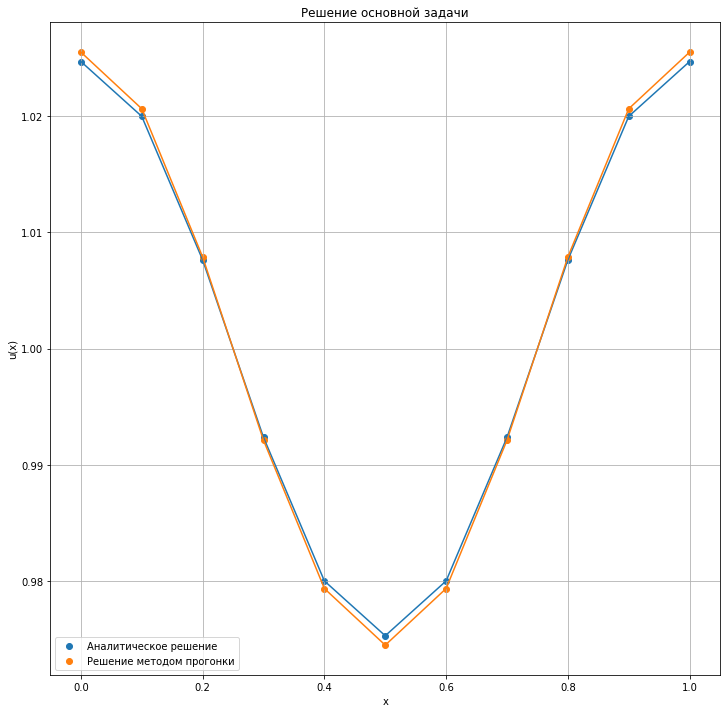

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u(x), label = 'Аналитическое решение')
plt.plot(x, u(x))
plt.scatter(x, u_l, label = 'Решение методом прогонки')
plt.plot(x, u_l)
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Решение основной задачи')

3. а) Решение основной задачи. Определяем функции как дано в условии

In [ ]:
def f(x):
  return np.e**(np.cos(2*np.pi*x))
def k(x):
  return 1
def q(x):
  return np.e**(np.sin(2*np.pi*x))

3. б) Коэффициенты функции $v_{l}$ для основной задачи

In [ ]:
def a(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x + 0.5*h)

def b(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return -(k(x + 0.5*h) + k(x - 0.5*h) + q(x)*(h**2))

def c(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x - 0.5*h)

def d(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return -(h**2)*f(x)

In [ ]:
alpha, beta = progonka_forward(x)
v_l = progonka_backward(alpha, beta)[::-1]
data4 = pd.DataFrame()
data4['Значение x'] = x
data4['Значение функции v(x)'] = v_l
data4.T

,0,1,2,3,4,5,6,7,8,9,10
Значение x,0.0,0.100000,0.200000,0.30000,0.400000,0.50000,0.600000,0.700000,0.800000,0.900000,1.0
Значение функции v(x),0.0,0.044474,0.067292,0.07823,0.083852,0.08653,0.086394,0.082286,0.071154,0.046676,0.0


3. в) Коэффициенты функции $w_{l}$ основной задачи

In [ ]:
def a(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x + 0.5*h)

def b(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return -(k(x + 0.5*h) + k(x - 0.5*h) + q(x)*(h**2))

def c(x):
  if (x == 0):
    return 0
  elif (x == 1):
    return 0
  else:
    return k(x - 0.5*h)

def d(x):
  if (x == 0):
    return 1
  elif (x == 1):
    return 1
  else:
    return 0

In [ ]:
alpha, beta = progonka_forward(x)
w_l = progonka_backward(alpha, beta)[::-1]
data5 = pd.DataFrame()
data5['Значение x'] = x
data5['Значение функции w(x)'] = v_l
data5.T

,0,1,2,3,4,5,6,7,8,9,10
Значение x,0.0,0.100000,0.200000,0.30000,0.400000,0.50000,0.600000,0.700000,0.800000,0.900000,1.0
Значение функции w(x),0.0,0.044474,0.067292,0.07823,0.083852,0.08653,0.086394,0.082286,0.071154,0.046676,0.0


#### Получаем итоговое решение

In [ ]:
u_0 = (k(0.5*h)*v_l[1] + k(1 - h*0.5)*v_l[-2] + f(0)*(h**2))/(k(0.5*h) + k(1 - 0.5*h) + q(0)*(h**2) - k(0.5*h)*w_l[1] - k(1 - 0.5*h)*w_l[-2])
u_l = np.array(v_l) + u_0*np.array(w_l)
data6 = pd.DataFrame()
data6['Значение x'] = x
data6['Значение функции u(x) (метод прогонки)'] = u_l
data6

,Значение x,Значение функции u(x) (метод прогонки)
0,0.0,1.046024
1,0.1,1.020730
2,0.2,0.991353
3,0.3,0.974015
4,0.4,0.974547
5,0.5,0.988168
6,0.6,1.007993
7,0.7,1.028964
8,0.8,1.046568
9,0.9,1.054595


##### Построим график полученного решения

Text(0.5, 1.0, 'Решение основной задачи')

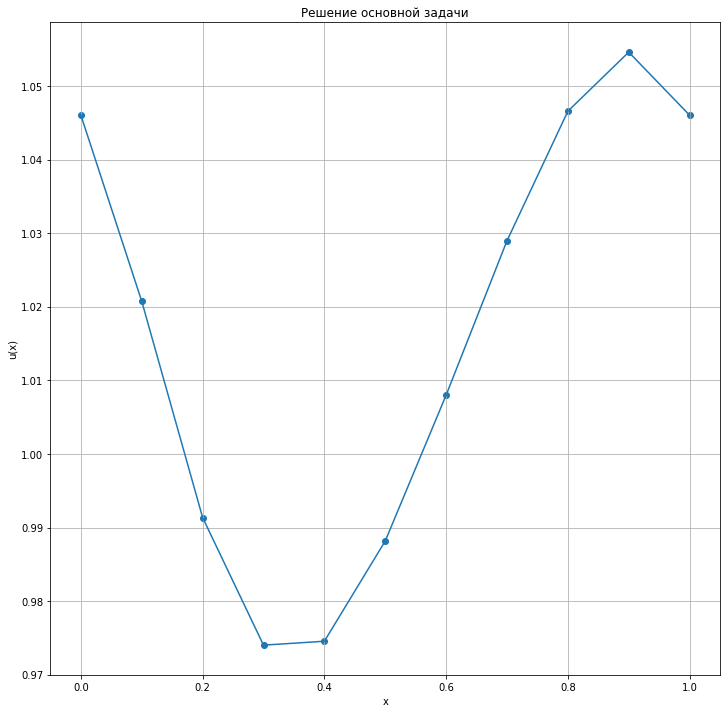

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u_l)
plt.plot(x, u_l)
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение основной задачи')

Если захочется можно изменить разбиение $x$ и поменять $h$, проверялось на 1000 точек, все работает, а графики более гладкими становятся